<a href="https://colab.research.google.com/github/FIorian/GasPowerplantEmissions/blob/main/GasTurbineEmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression method sources:


*   https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171
*   https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/linear_regression.ipynb



In [30]:
# IMPORTS
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensofflow imports
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# util imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Following 2 blocks get the datast from the web and unpack it:

In [31]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip

--2020-10-28 15:35:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1090294 (1.0M) [application/x-httpd-php]
Saving to: ‘pp_gas_emission.zip.1’

pp_gas_emission.zip 100%[===================>]   1.04M  3.39MB/s    in 0.3s    

2020-10-28 15:35:24 (3.39 MB/s) - ‘pp_gas_emission.zip.1’ saved [1090294/1090294]



In [32]:
!unzip pp_gas_emission.zip

Archive:  pp_gas_emission.zip
replace gt_2011.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gt_2011.csv             
  inflating: gt_2012.csv             
  inflating: gt_2013.csv             
  inflating: gt_2014.csv             
  inflating: gt_2015.csv             


In [33]:
# Defining some parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [34]:
# CREATING AND FILLING UP DATABASE

dataset = pd.read_csv("gt_2013.csv")
# dataset.append(pd.read_csv("gt_2012.csv"))
# dataset.append(pd.read_csv("gt_2013.csv"))
# dataset.append(pd.read_csv("gt_2014.csv"))
# dataset.append(pd.read_csv("gt_2015.csv"))

dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020
...,...,...,...,...,...,...,...,...,...,...,...
7147,4.8631,1027.0,81.084,4.2825,34.045,1100.0,529.98,168.38,14.290,1.2538,78.397
7148,4.5173,1027.4,80.813,4.2481,33.904,1100.1,530.47,168.07,14.344,1.0808,78.251
7149,4.2717,1027.9,80.380,4.2817,34.165,1099.9,529.56,168.55,14.395,1.0472,77.269
7150,4.0853,1028.6,78.907,4.2313,33.802,1100.1,530.61,167.98,14.343,1.0875,77.985


In [35]:
# checking for empty values
dataset.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [36]:
# adding bias term
dataset = pd.concat([pd.Series(1, index=dataset.index, name='00'), dataset], axis=1)
dataset.head()

,00,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,1,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,1,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,1,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [37]:
# Define input and output data
X = dataset.drop(columns=['CO', 'NOX'])
Y = dataset.drop(columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])

X.head()

,00,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,1,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564
1,1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572
2,1,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543
3,1,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458
4,1,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464


In [38]:
# # normalize X
# for i in range(1, len(X.columns)):
#     X.iloc[i-1] = X.iloc[i-1]/np.max(X.iloc[i-1])
# X.head()

,00,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,0.000958,0.008986,0.977482,0.086491,0.002293,0.018365,1.0,0.518551,0.105558,0.010123
1,0.000962,0.008942,0.980767,0.086483,0.002282,0.018385,1.0,0.518261,0.105039,0.010166
2,0.000961,0.008774,0.979635,0.086329,0.002291,0.018423,1.0,0.518223,0.105303,0.010128
3,0.000964,0.008651,0.982837,0.086289,0.002297,0.018494,1.0,0.517684,0.104985,0.010084
4,0.000958,0.008640,0.976617,0.085385,0.002304,0.018405,1.0,0.518687,0.105501,0.010028


In [39]:
Y.head()

,00,CO,NOX
0,1,9.3472,98.741
1,1,11.0160,104.290
2,1,10.7500,103.470
3,1,12.2870,108.810
4,1,9.8229,100.020


needed parameters:

In [51]:
# casting
X = tf.cast(X, tf.float32)
Y = tf.cast(Y, tf.float32)


In [52]:
# Wight and Bias
W = tf.Variable(np.random.randn(), name='weights')
b = tf.Variable(np.random.randn(), name='bias')

learning_rate = 0.01
epochs = 200

n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

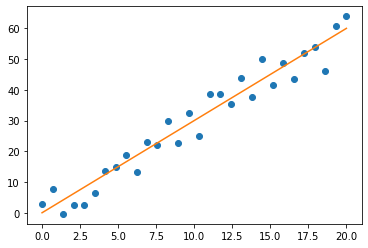

In [53]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [55]:
# Linear regression
pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GreadientDescentOptimizer(learning_rate).minimize(cost)

InvalidArgumentError: ignored

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()